# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

  ## Sai Deepak

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [69]:
#Import ncecessary libraies 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Import Scikit libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Loading the dataset

In [37]:
url = "Loan_Modelling.csv"
loanData = pd.read_csv(url)


loanData.head(10) 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


## Data Overview

* Observations
* Sanity checks

In [38]:
loanData.shape

(5000, 14)

In [39]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
loanData.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


No Null values exists in data and also all categerical values are already treated as int64.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

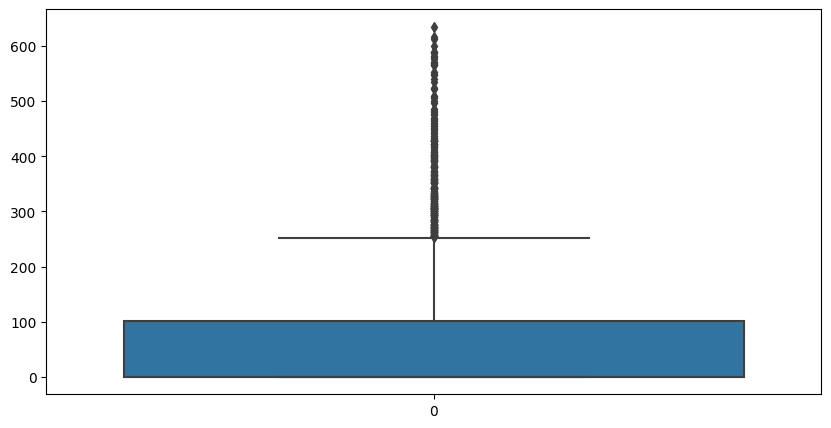

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(loanData["Mortgage"])
plt.show()

For more than 50 percentile of the data, Mortage is zero, $101K is in 75th Percentile and there are lot of outliers exists in the Mortage data.

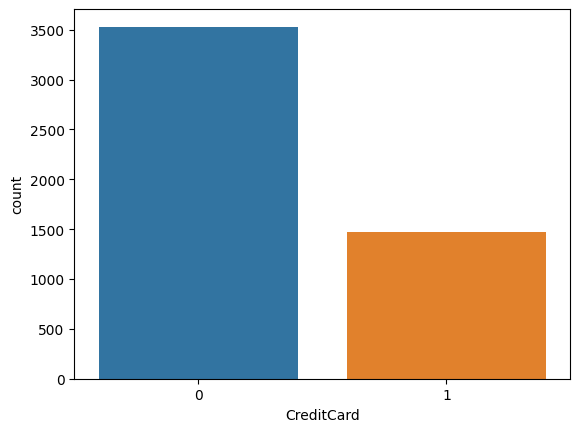

In [41]:
sns.countplot(x=loanData["CreditCard"] )
plt.show()

1500 users have credit card

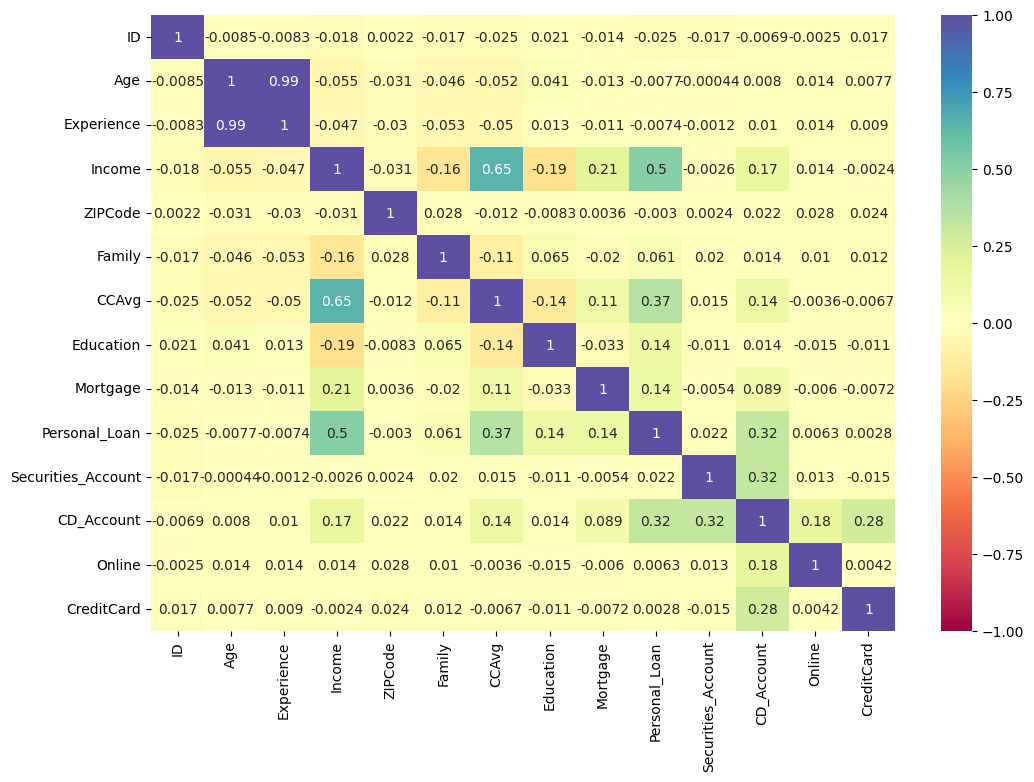

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(loanData.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Income, CCAvg and CD_Account have moderate correlation with Personal Loan. There is strong co-relation between Income and CCAvg

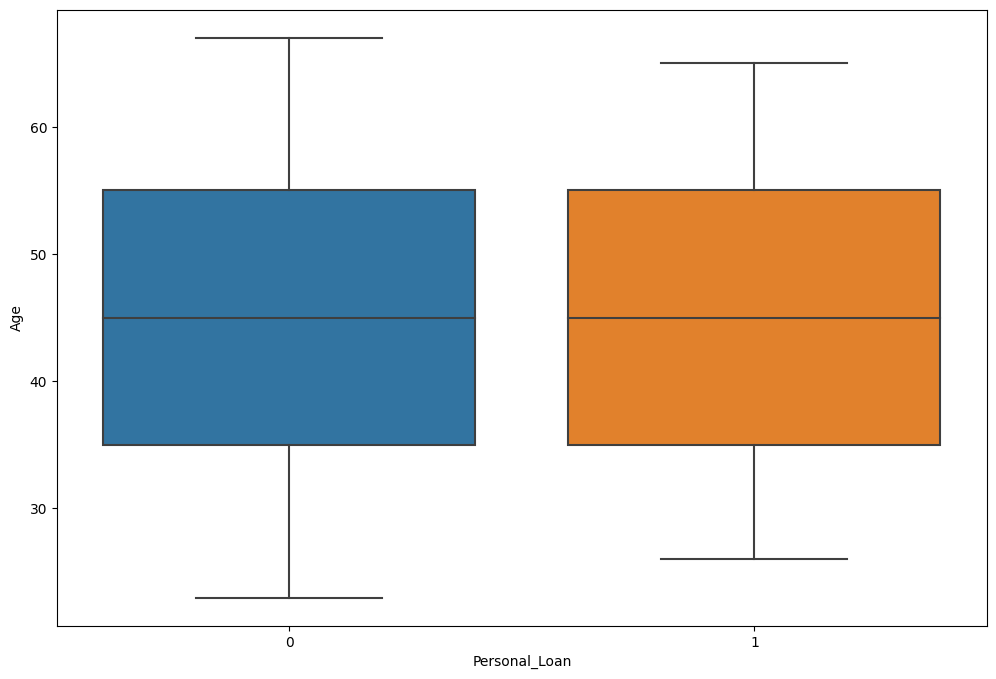

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot( x = loanData["Personal_Loan"], y=loanData["Age"]  )
plt.show()

There is no impact of Age distribution on Personal Loan

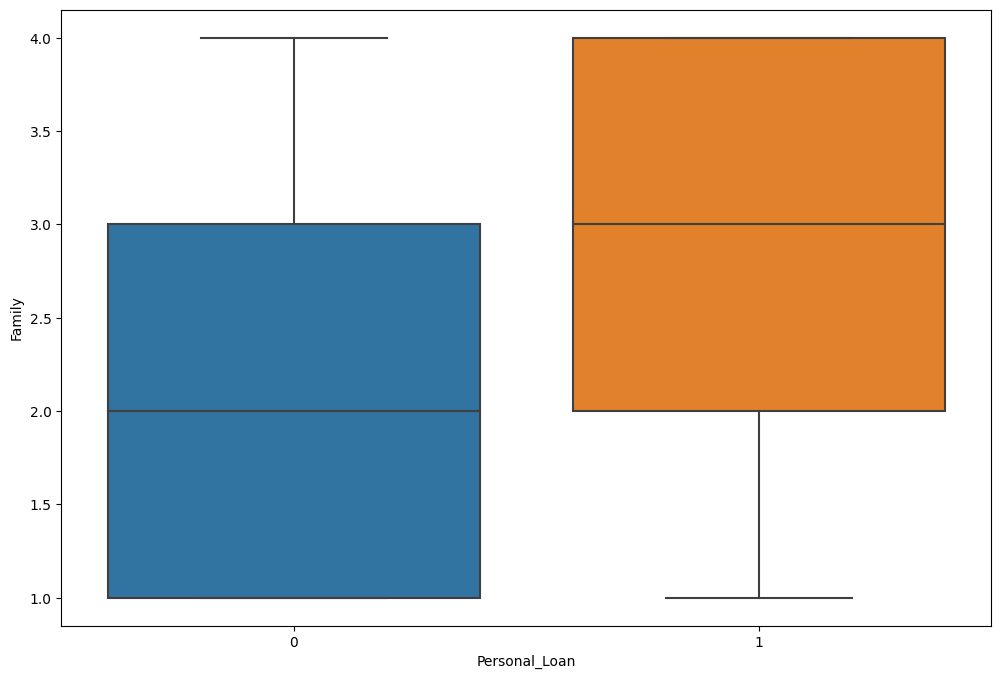

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot( x = loanData["Personal_Loan"], y=loanData["Family"]  )
plt.show()


Looking at the box plot above, it is observed that , who ever accepted personal loan , has comparatively bigger families.

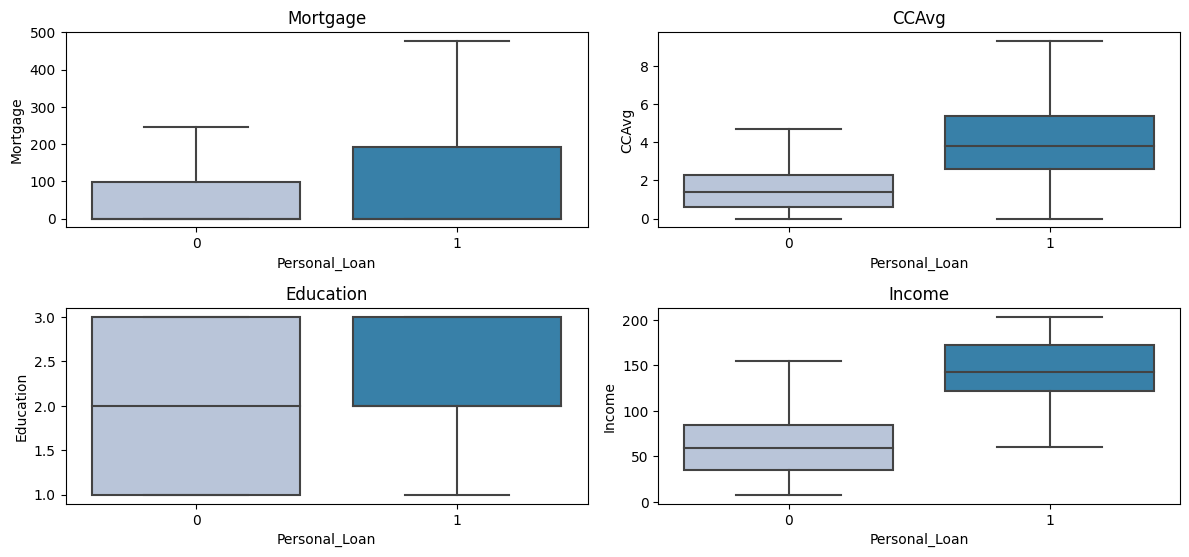

In [45]:
# Let's compare analysis of Personal Loan choice with other Variables for other variables:
cols = loanData[
    [
        "Mortgage",
        "CCAvg",
        "Education",
        "Income"
    ]
].columns.tolist()

plt.figure(figsize=(12,8))
for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=loanData["Personal_Loan"], y=loanData[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

1. Users  with More Mortgage  are inclined to prefer personal loan
2. Users who preferred Personal loan does have more CCAvg too
3. People with Under Graduate are not inclined for Personal loan
4. People who preferred Personal does have more Income.


In [80]:
creditData.loc[creditData['Personal_Loan']==1,['ID']].count()

ID    480
dtype: int64

**** Out of 5000 cutomer data, only 480 customers preferred personal loan. In this Data, reducing False Negative is very critical.  Recall provides an indication of missed positive predictions. For Decision tree model , recall score is important


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Split Data ###

In [46]:
X = loanData.drop("Personal_Loan" , axis=1)
y = loanData.pop("Personal_Loan")

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## Model Building

### Model Evaluation Criterion

* 


### Model Building: Logistic Regression

### Model Performance Improvement: Logistic Regression

### Model Building: Decision Tree

In [48]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [50]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9793333333333333


In [51]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

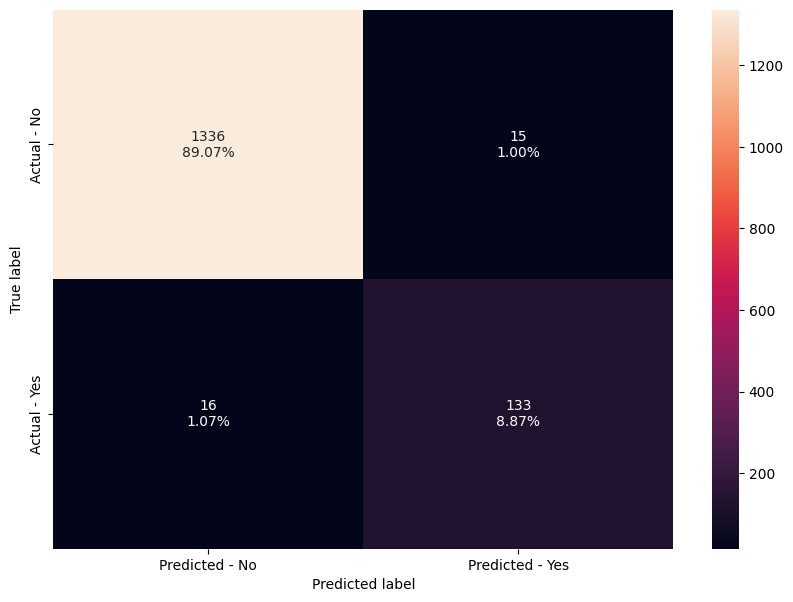

In [53]:
make_confusion_matrix(dTree,y_test)

In [54]:
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8926174496644296


** Recall score and Accuracy are very good for this Decision Tree model. But there is slight a gap for Recall on Test set.

In [56]:
features = list(X.columns)
print(features)

['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


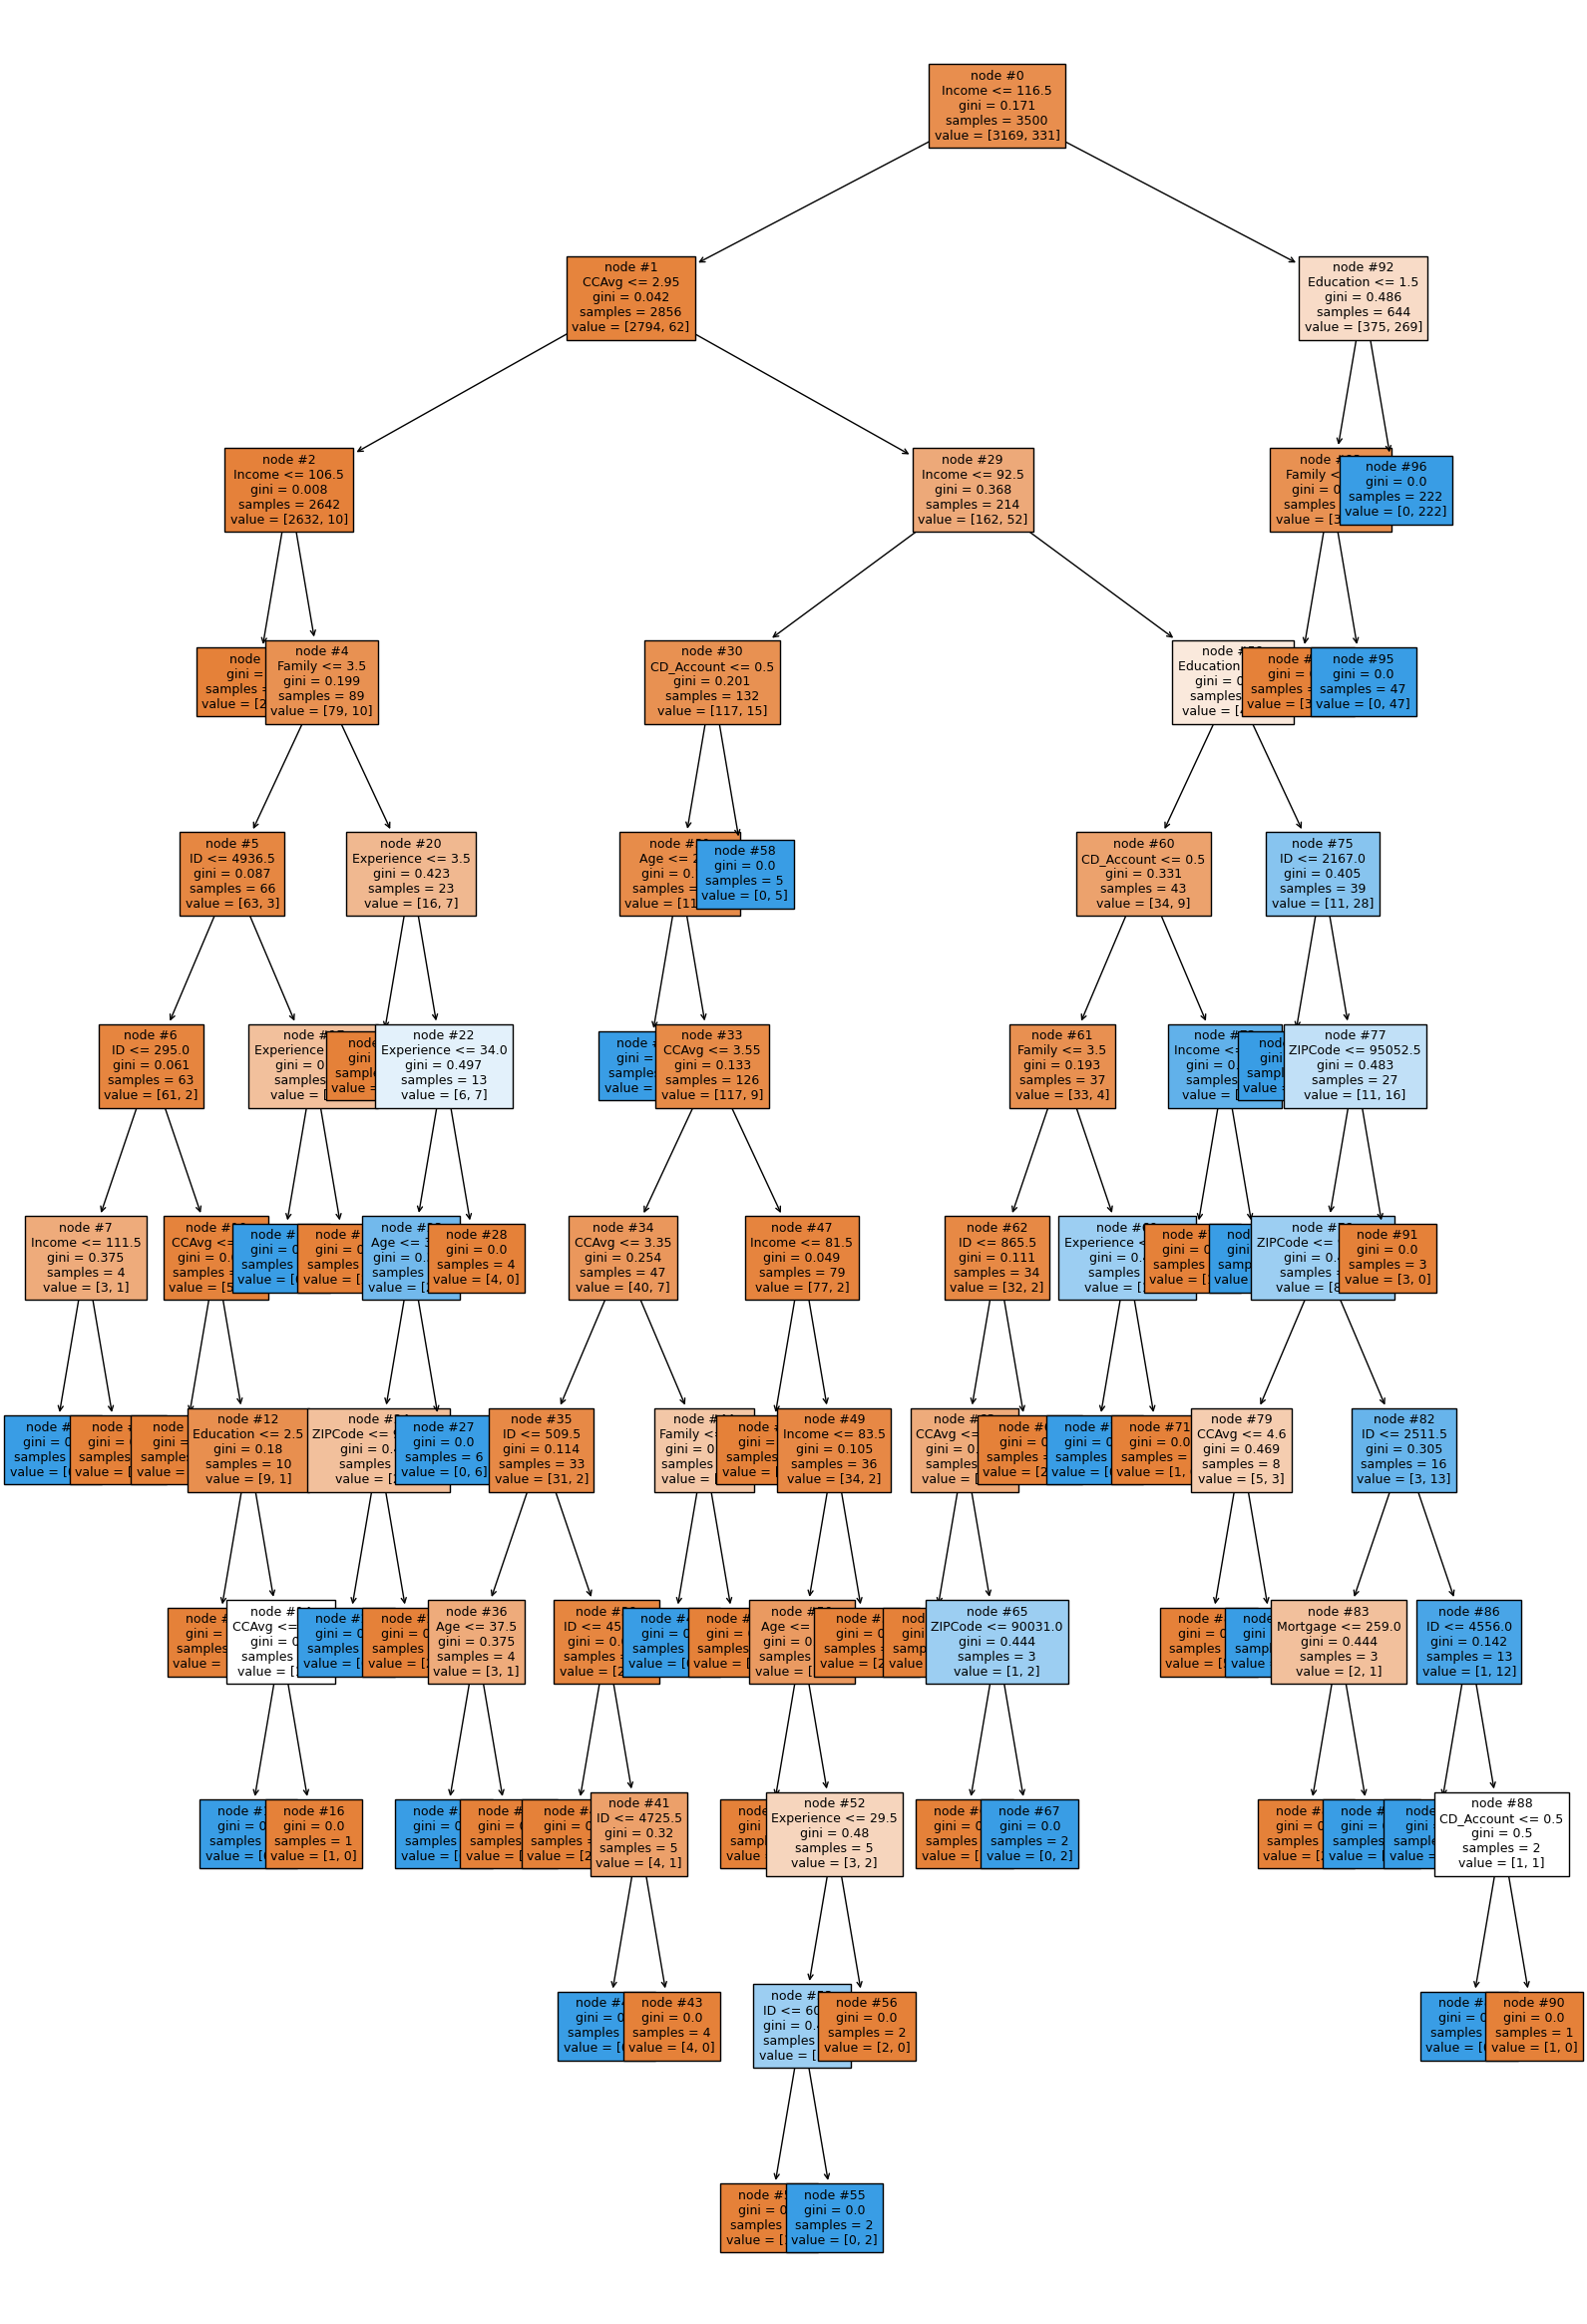

In [59]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=features,filled=True,fontsize=9,node_ids=True)
plt.show()

** Decision Tree is complex

In [61]:
print(tree.export_text(dTree,feature_names=features,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ID <= 295.00
|   |   |   |   |   |   |--- Income <= 111.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Income >  111.50
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |--- ID >  295.00
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [49.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 2.65
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- 

In [63]:
#Importance of Feature building
print (pd.DataFrame(dTree.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))


                    Importance
Education             0.402286
Income                0.304042
Family                0.157297
CCAvg                 0.053165
CD_Account            0.024352
ID                    0.017656
Experience            0.017286
ZIPCode               0.011810
Age                   0.009880
Mortgage              0.002224
Securities_Account    0.000000
Online                0.000000
CreditCard            0.000000


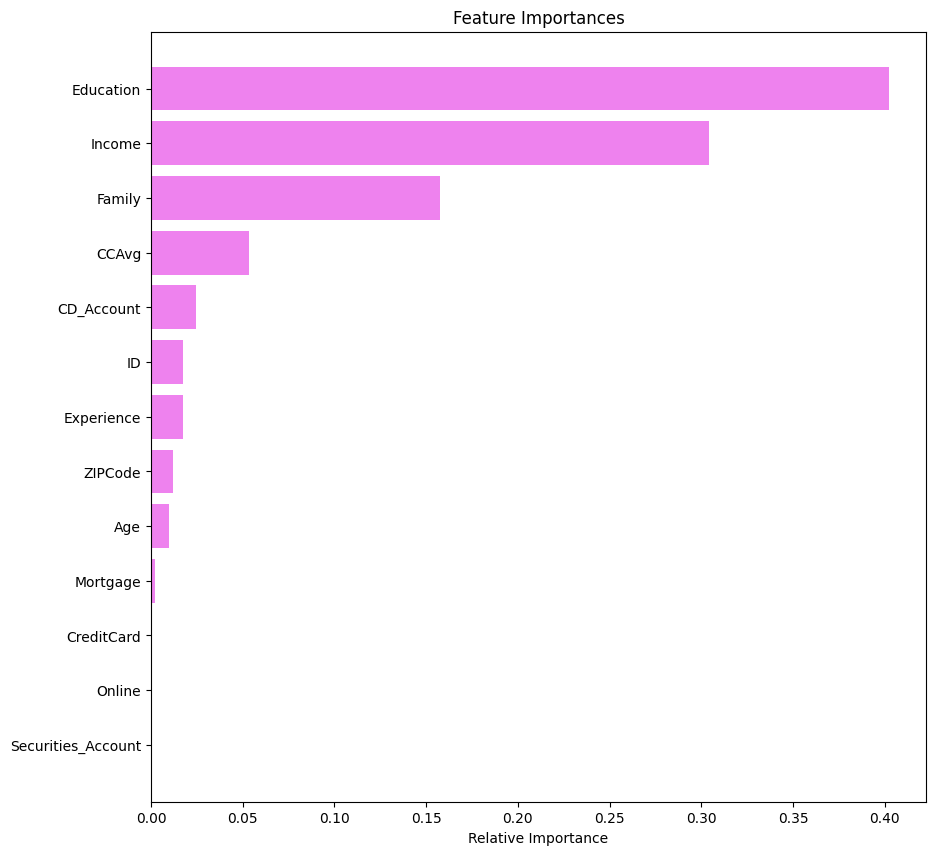

In [65]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Education and Income got more Importance in this decision tree model

## Model Performance Improvement: Decision Tree

#### Pre-Pruning ####

Using Grid Search CV for Hyperparameter tuning

In [71]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

scorer = make_scorer(recall_score)


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

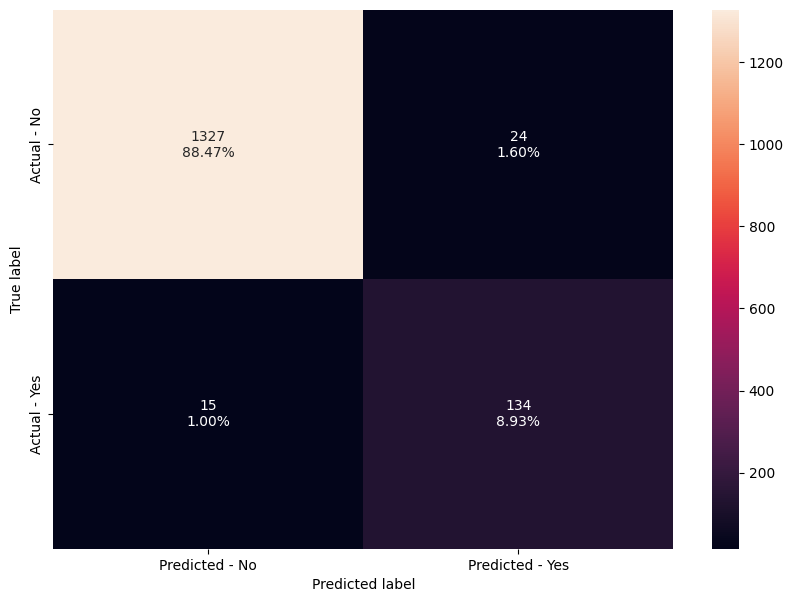

In [72]:
make_confusion_matrix(estimator,y_test)

In [73]:
get_recall_score(estimator)

Recall on training set :  0.9667673716012085
Recall on test set :  0.8993288590604027


With Hyper Parameter tuning using Grid Search CV ( Pre-Pruning ), Recall score on test data is slightly improved, while on training, it slightly reduced. For this kind of data, reducing the false negative is critical. Pre-pruning has reduced false negative percentage.

In [82]:
print(tree.export_text(estimator,feature_names=features,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- ID <= 766.50
|   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |--- ID >  766.50
|   |   |   |   |--- weights: [0.00, 6.80] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 100.00
|   |   |   |   |--- ZIPCode <= 91169.00
|   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |--- ZIPCode >  91169.00
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |--- Income >  100.00
|   |   |   |   |--- 

In [84]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

                    Importance
Income                0.622927
Family                0.146723
Education             0.130659
CCAvg                 0.079573
CD_Account            0.011659
ZIPCode               0.006692
Age                   0.000885
ID                    0.000880
Experience            0.000000
Mortgage              0.000000
Securities_Account    0.000000
Online                0.000000
CreditCard            0.000000


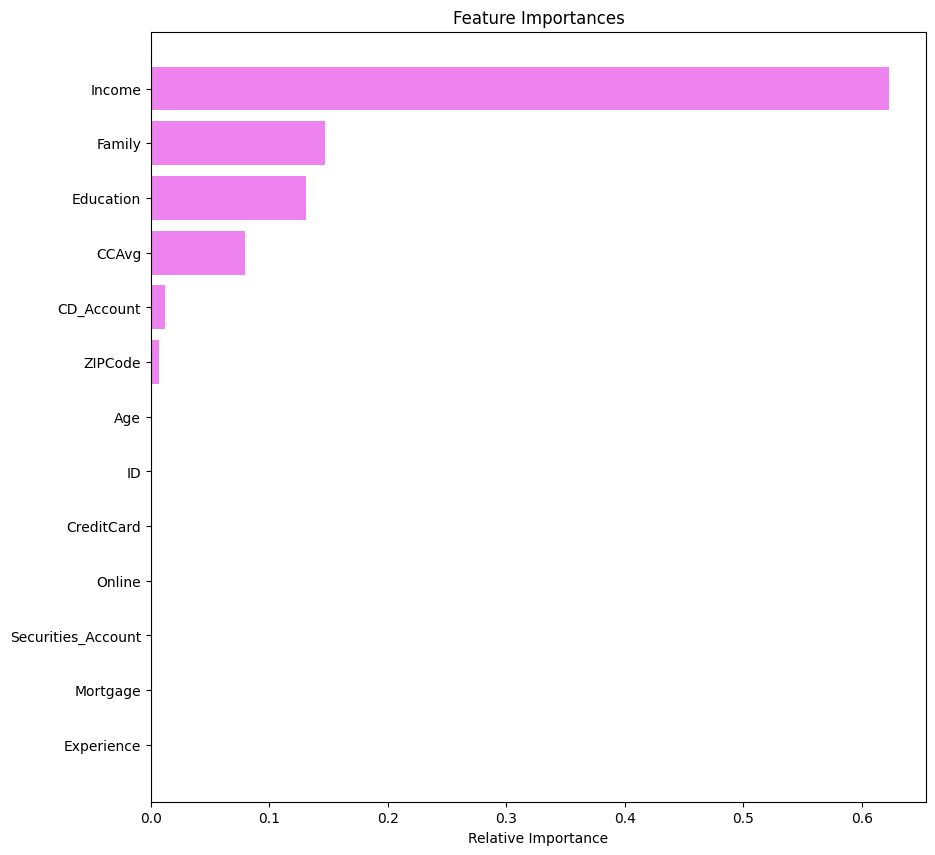

In [86]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

** After Pre-Pruning using Perform Grid Search CV , model has given more importance to Income

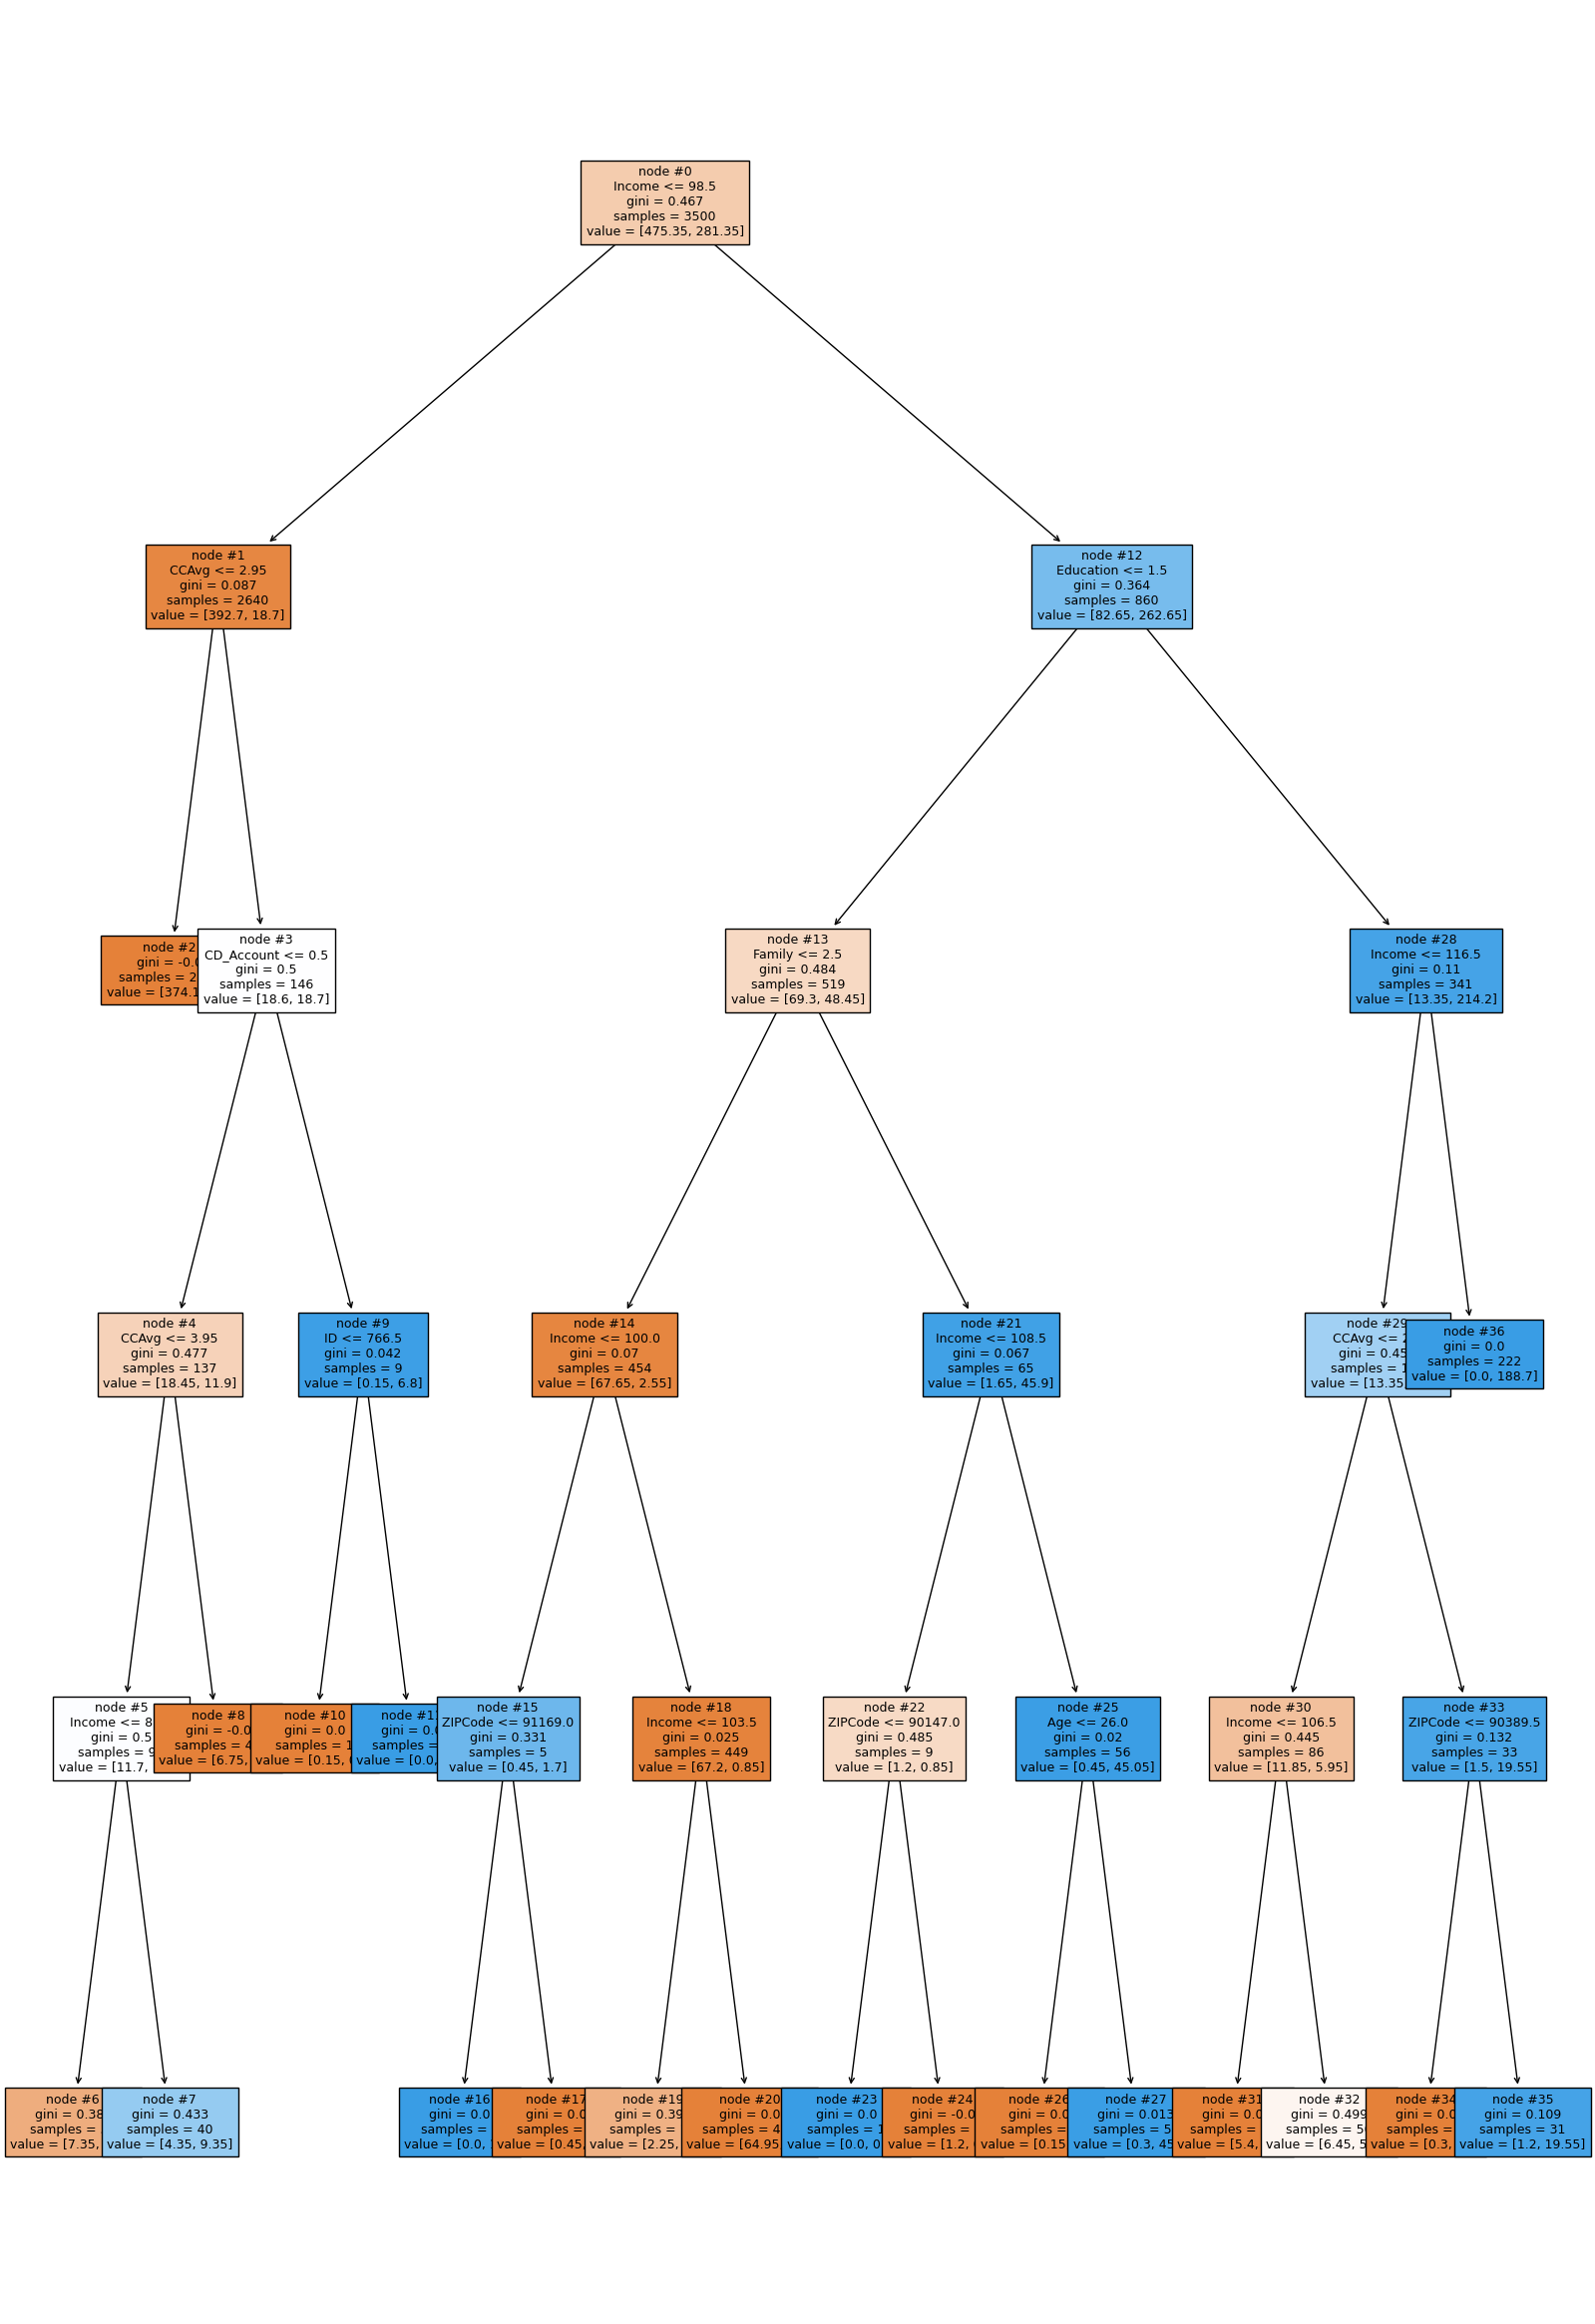

In [88]:
plt.figure(figsize=(20,30))
tree.plot_tree(estimator,feature_names=features,filled=True,fontsize=9,node_ids=True)
plt.show()

** After Pre-Pruning, Model Complexity is reduced. Now of nodes are reduced to 36

## Post-Pruning using Cost Complexity Pruning

In [89]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [90]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000187,0.000562
2,0.000223,0.001676
3,0.000264,0.002203
4,0.000268,0.003277
5,0.000269,0.004351
6,0.000359,0.005427
7,0.000381,0.005808
8,0.000381,0.006189
9,0.000381,0.006570


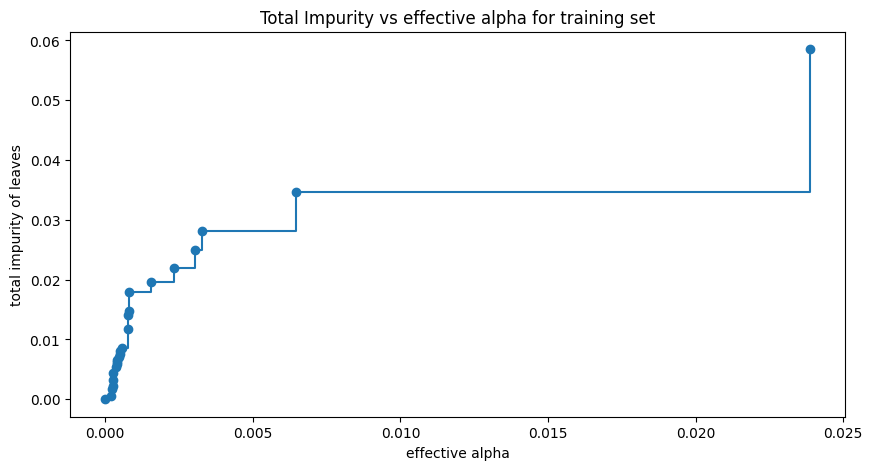

In [91]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [94]:
#Train the model using effective Alphas. he last value in ``ccp_alphas`` is the alpha value that prunes the whole tree,
#leaving the tree, ``clfs[-1]``, with one node.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 7 with ccp_alpha: 0.056364969335601575


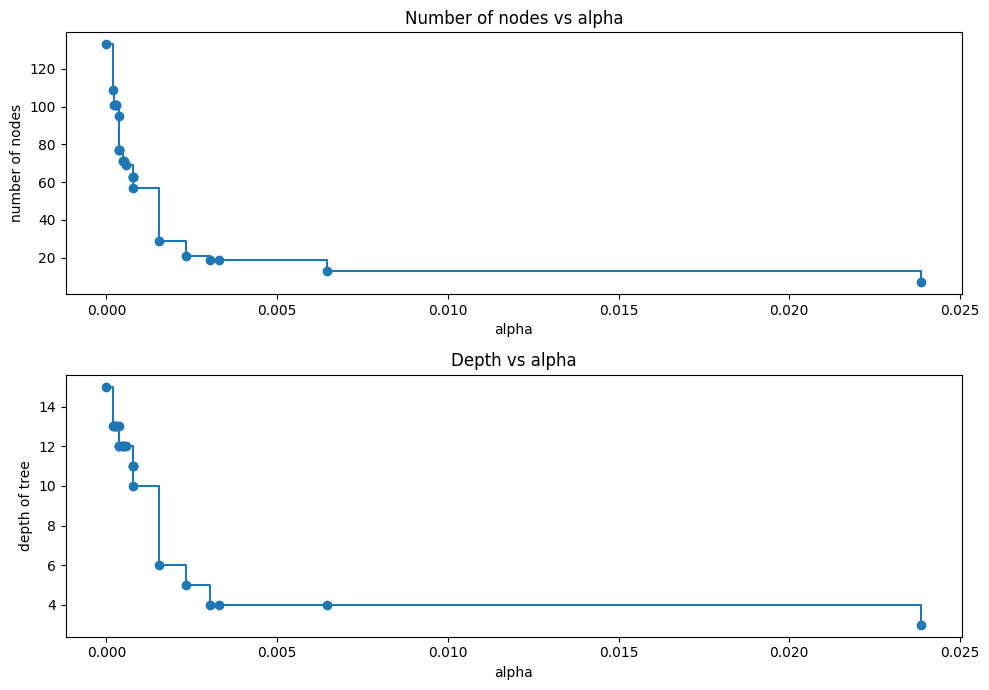

In [95]:
#For the remainder, we remove the last element in
#``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
#node. Here we show that the number of nodes and tree depth decreases as alpha
#increases.

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs Alpha on Training and test sets

In [96]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

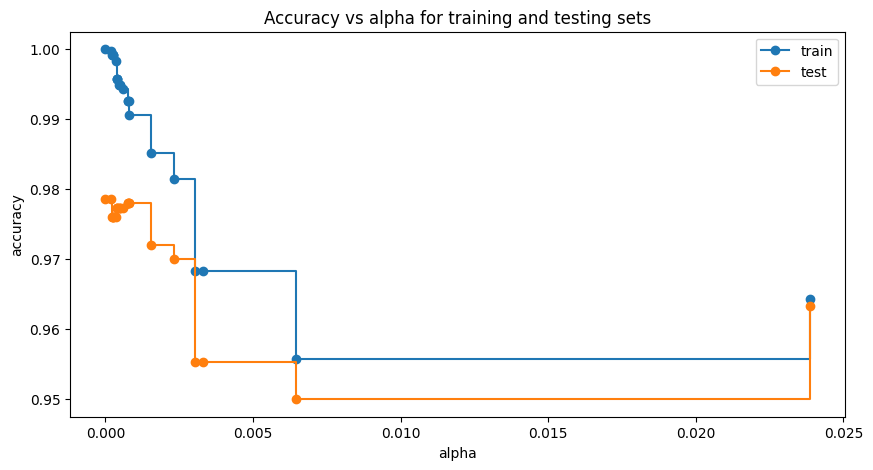

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [98]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)
Training accuracy of best model:  1.0
Test accuracy of best model:  0.9786666666666667


##### Since Recall score is important #####

In [100]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [101]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

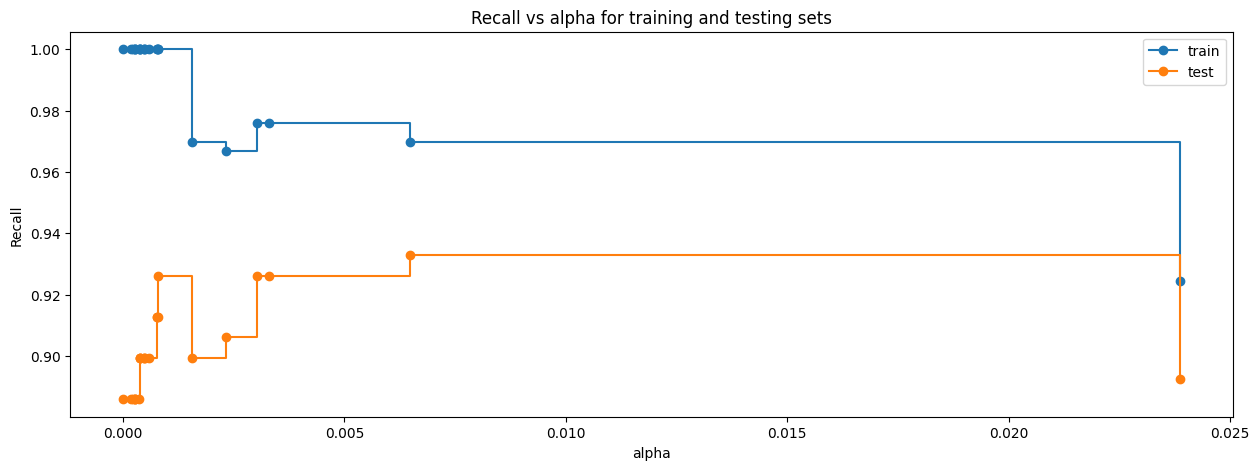

In [102]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

*** Maximum Value of Recall is at the Value of 0.06 Alpha

In [103]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.006472814718223804,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


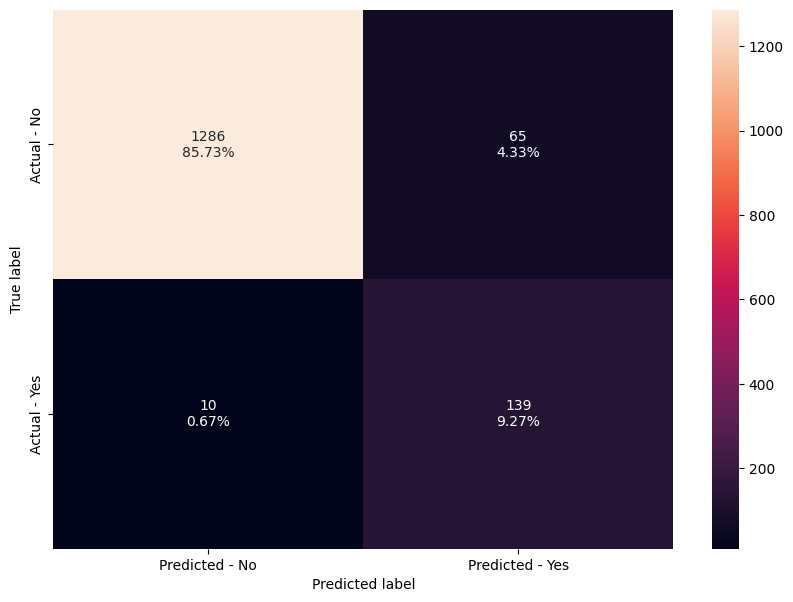

In [104]:
make_confusion_matrix(best_model,y_test)

In [105]:
get_recall_score(best_model)

Recall on training set :  0.9697885196374623
Recall on test set :  0.9328859060402684


After Post Pruning, Recall is improved , For this Model , Recall score is important

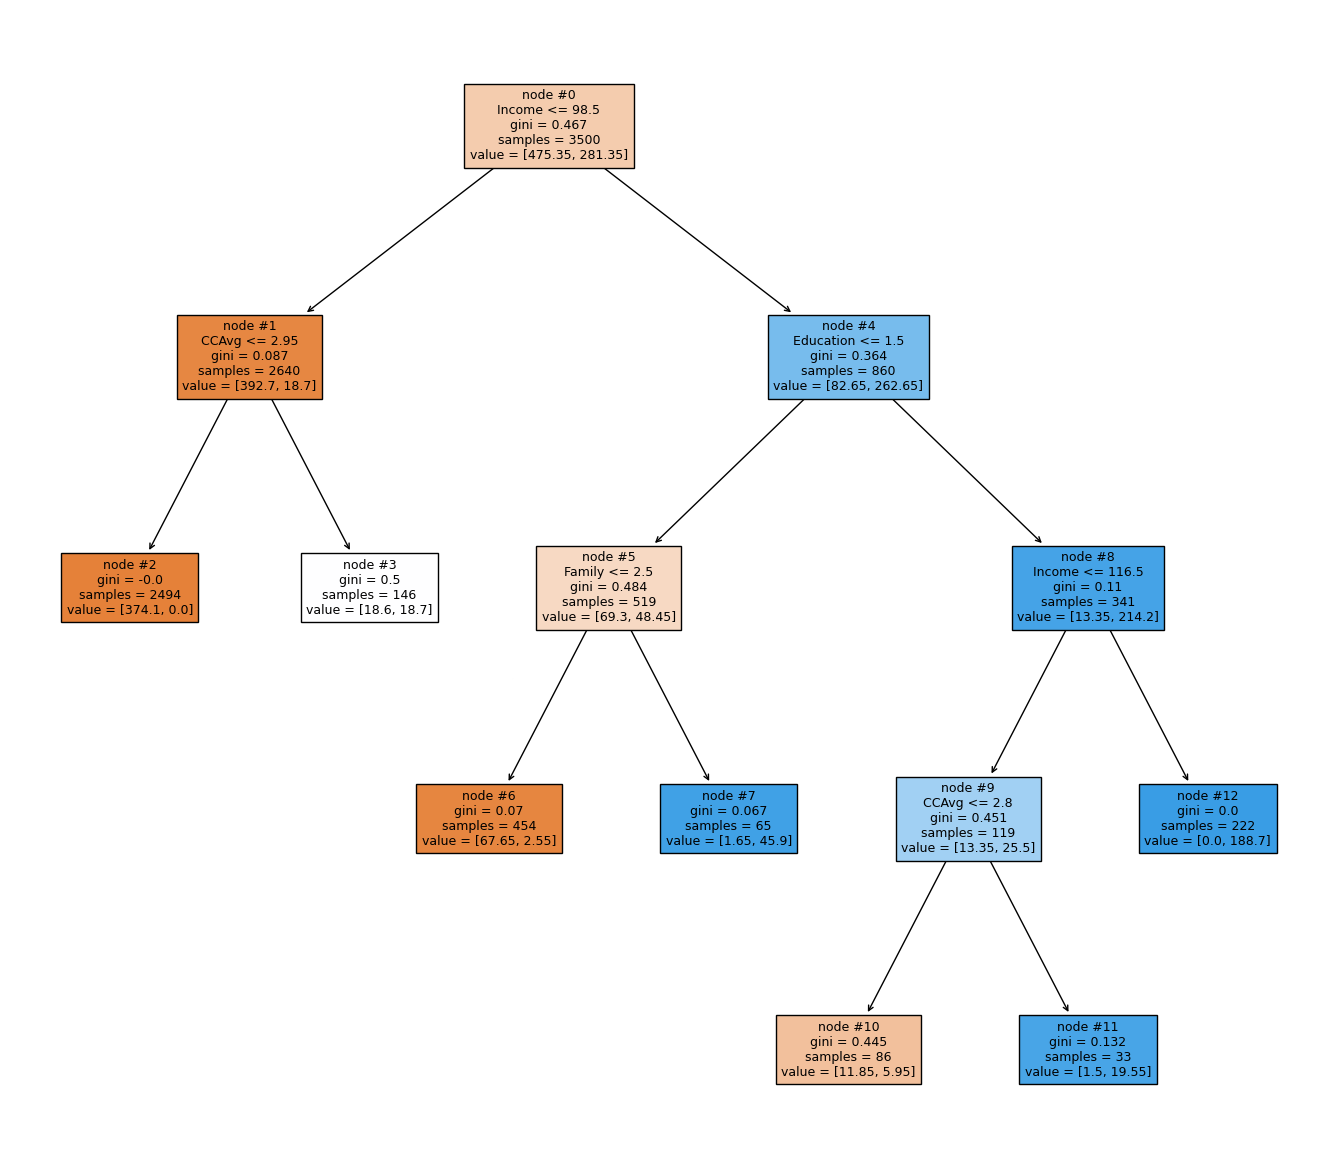

In [107]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=features,filled=True,fontsize=9,node_ids=True)
plt.show()

******** Post-Pruning Model has Just 12 nodels. This Model is easy to Visulaize

In [111]:
print(tree.export_text(best_model,feature_names=features,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- weights: [11.85, 5.95] class: 0
|   |   |   |--- CCAvg >  2.80
|   |   |   |   |--- weights: [1.50, 19.55] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



In [112]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Income              0.631776
Family              0.154827
Education           0.137875
CCAvg               0.075522
ID                  0.000000
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


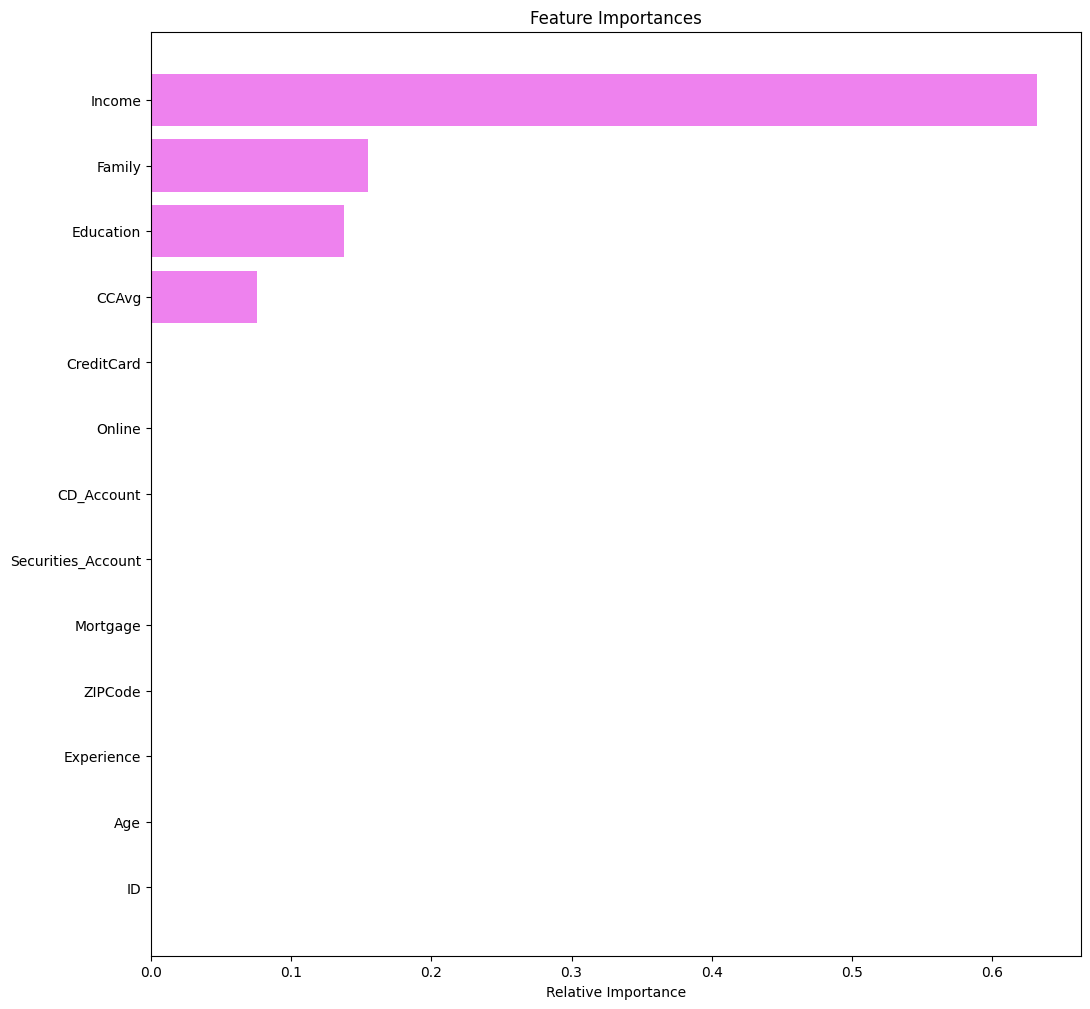

In [114]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

****** Similar to Pre-Pruning , Post-Pruning Decision model also gave more Importance to Income.

## Model Comparison and Final Model Selection

In [117]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.96,0.969], 'Test_Recall':[0.892,0.899,0.932]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.000,0.892
1,Decision treee with hyperparameter tuning,0.960,0.899
2,Decision tree with post-pruning,0.969,0.932


**** Decision Tree with Post-Pruning has better recall score on Test data as well as Training data. Most important, there is no much gap between Training recall score and Testing recall score

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

For the given data the percentage of Positives is very low. We can't consider accuracy as a measurement as False Negatives may impact a lot. So, Recall score has to be conosidering for building a model. We need to build a Decision tree model that predicts with highest Recall score. 

  1. Since Post Pruning Model has highest Recall score on test data, It is considered as best model. 
  2.  Income has more impact on Customer's Personal Loan decision. Bank can approach Customer who has more Income.
  3. Family , Education and CCAvg has minmal to moderate Importance on Model. Bank can also reach to customer who has bigger family size , Higher Education and more CC Avg

___